In [180]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error 
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [200]:
#1
iris = pandas.read_csv('iris.csv')
iris = pandas.DataFrame(iris)
print(iris)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [201]:
#2a
print('Mean fo All:')
print(np.mean(iris))

print('Std for All:')
print(np.std(iris))

versi = iris[iris['variety']=="Versicolor"]
setos = iris[iris['variety']=="Setosa"]
virgi = iris[iris['variety']=="Virginica"]

print('Mean for Setosa:')
print(np.mean(setos))

print('Mean for Versicolor:')
print(np.mean(versi))

print('Mean for Virginica:')
print(np.mean(virgi))

print('Std for Setosa:')
print(np.std(setos))

print('Std for Versicolor:')
print(np.std(versi))

print('Std for Virginica:')
print(np.std(virgi))

#Największe odchylenie standardowe ma składowa petal.length

Mean fo All:
sepal.length    5.843333
sepal.width     3.057333
petal.length    3.758000
petal.width     1.199333
dtype: float64
Std for All:
sepal.length    0.825301
sepal.width     0.434411
petal.length    1.759404
petal.width     0.759693
dtype: float64
Mean for Setosa:
sepal.length    5.006
sepal.width     3.428
petal.length    1.462
petal.width     0.246
dtype: float64
Mean for Versicolor:
sepal.length    5.936
sepal.width     2.770
petal.length    4.260
petal.width     1.326
dtype: float64
Mean for Virginica:
sepal.length    6.588
sepal.width     2.974
petal.length    5.552
petal.width     2.026
dtype: float64
Std for Setosa:
sepal.length    0.348947
sepal.width     0.375255
petal.length    0.171919
petal.width     0.104326
dtype: float64
Std for Versicolor:
sepal.length    0.510983
sepal.width     0.310644
petal.length    0.465188
petal.width     0.195765
dtype: float64
Std for Virginica:
sepal.length    0.629489
sepal.width     0.319255
petal.length    0.546348
petal.width     0

In [183]:
#2b

print("Liczebność klasy Setosa: " ,len(setos))

print("Liczebność klasy Versicolor: " ,len(versi))

print("Liczebność klasy Virginica: " ,len(virgi))

#Wszystkie klasy mają taką samą liczebność

Liczebność klasy Setosa:  50
Liczebność klasy Versicolor:  50
Liczebność klasy Virginica:  50


In [204]:
#2c


In [184]:
#2d

print('Correlation:')
print(iris.corr(method ='pearson'))

#Najbardziej skorelowana jest para petal.length oraz petal.width

Correlation:
              sepal.length  sepal.width  petal.length  petal.width
sepal.length      1.000000    -0.117570      0.871754     0.817941
sepal.width      -0.117570     1.000000     -0.428440    -0.366126
petal.length      0.871754    -0.428440      1.000000     0.962865
petal.width       0.817941    -0.366126      0.962865     1.000000


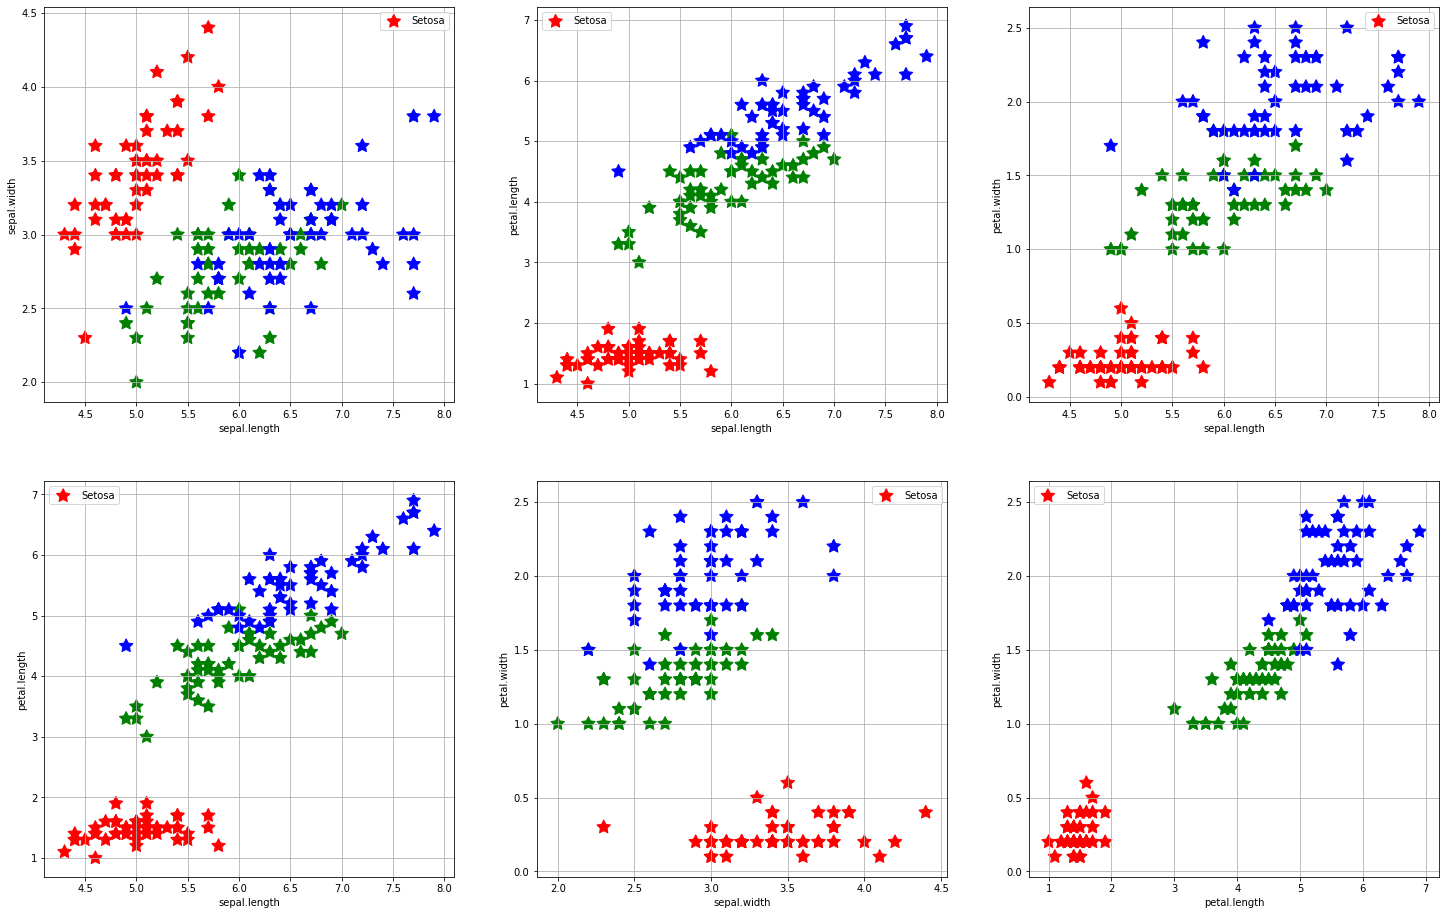

In [188]:
#2e
fig, axs = plt.subplots(2,3, figsize = (25, 16))
colors = {}
colors["Setosa"] = "red"
colors["Versicolor"] = "green"
colors["Virginica"] = "blue"

spl = 'sepal.length'
spw = 'sepal.width'
ptl = 'petal.length'
ptw = 'petal.width'

value = {}
value[-1] = spl
value[0] = spw
value[1] = ptl
value[2] = ptw
value[3] = ptw

for i in range(3):
    axs[0,i].scatter(iris[spl],iris[value[i]], c = [ colors[x] for x in iris["variety"]], marker =(5,1,0), s = 200)
    axs[0,i].legend(iris["variety"])
    axs[0,i].set_ylabel(value[i])
    axs[0,i].set_xlabel(spl)
    axs[0,i].grid(True)
    
    axs[1,i].scatter(iris[value[i-1]],iris[value[i+1]], c = [ colors[x] for x in iris["variety"]], marker =(5,1,0), s = 200)
    axs[1,i].legend(iris["variety"])
    axs[1,i].set_ylabel(value[i+1])
    axs[1,i].set_xlabel(value[i-1])
    axs[1,i].grid(True)

#Najłatwiej odseparować klasę Setosa, natomiast najbardziej różnicująca jest zmienna petal.length

In [189]:
#3

iris1 = datasets.load_iris()

X = iris1.data[:,:4]
y = iris1.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

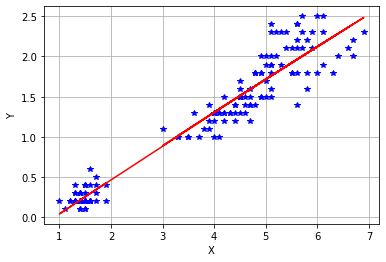

In [190]:
#4a
x = iris['petal.length']

y = iris['petal.width']

x = x.values.reshape(-1,1)

lg = LinearRegression()
poly = PolynomialFeatures(degree=2)

poly_x = poly.fit_transform(x)
x = x.reshape(-1,1)
lg.fit(poly_x, y)
y_pred = lg.predict(poly_x)

plt.plot(x, y, "b*")
plt.plot(x, y_pred, color='red', )
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)

#Jest to model regresji liniowej

In [192]:
#4b

x1 = X_train[:,2:3]
y1 = y_train

x1 = x1.reshape(-1,1)
lg.fit(x1, y1)
print ('Parametry modelu: ', [lg.coef_[0], lg.intercept_] )


Parametry modelu:  [0.4397676701269805, -0.6347884503985957]


In [193]:
#4c

x2 = X_test[:,2:3]

y2_pred = lg.predict(x2)

print("Błąd średniokwadratowy:", mean_squared_error(y_test,y2_pred)) 

Błąd średniokwadratowy: 0.06870735220683044


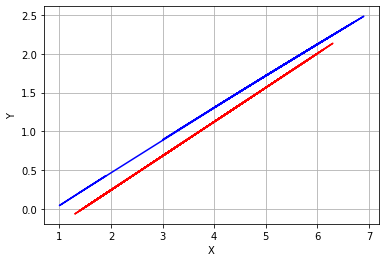

In [194]:
#4d

plt.plot(x, y_pred, color = "blue")
plt.plot(x2, y2_pred, color = "red")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)

#Linie nie się nie pokrywają, powodem tego jest niedokładne przewidywanie wartości bazując na mniejszym zbiorze testowym

In [205]:
#5a
clf = svm.SVC(kernel='rbf', gamma = 'auto', random_state=0)
clf.fit(X_train, y_train)

#Ma na to wpływ parametr random_state

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [206]:
#5b
X1_test = StandardScaler().fit_transform(X_test)
y1_pred = KMeans(n_clusters=4, random_state=0).fit_predict(X1_test)

matrix = confusion_matrix(y_test, y1_pred)
accu = accuracy_score(y_test, y1_pred)

print("Macierz pomyłek: \n", matrix)
print("Dokładność klasyfikacji:", accu)

Macierz pomyłek: 
 [[ 0 11  0  4]
 [16  0  0  0]
 [ 5  0  9  0]
 [ 0  0  0  0]]
Dokładność klasyfikacji: 0.2


In [207]:
#5c
X1 = StandardScaler().fit_transform(X)

#Y = y.values.reshape(-1,1)

Y1 = StandardScaler().fit_transform(Y)

pca1 = PCA(n_components=2)
pca2 = PCA(n_components=1)

pca2.fit(Y1)
pca1.fit(X1)
X_pca = pca1.transform(X1)
y_pca = pca2.transform(Y)

print("Suma wariancji wynosi:" ,pca1.explained_variance_ratio_[0] + pca1.explained_variance_ratio_[1])

print("Suma wariancji wynosi:" ,pca2.explained_variance_ratio_[0])


Suma wariancji wynosi: 0.9581320720000164
Suma wariancji wynosi: 1.0


In [197]:
#5d


#clf.fit(X1, Y1) ??

In [ ]:
#5e 

